In [361]:
data = read.csv('Du lieu cung cap/houses_to_rent.csv', row.names = 1, header= TRUE)

In [362]:
head(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,property.tax,fire.insurance,total
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270"


In [363]:
tail(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,property.tax,fire.insurance,total
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6074,0,28,1,1,0,NA,not acept,furnished,R$0,"R$1,390",R$0,R$18,"R$1,408"
6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,1,160,3,2,2,NA,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"
6079,1,60,2,1,1,4,acept,furnished,R$489,"R$1,900",R$0,R$25,"R$2,414"


In [364]:
str(data)

'data.frame':	6080 obs. of  13 variables:
 $ city          : int  1 0 1 1 1 1 1 1 1 1 ...
 $ area          : int  240 64 443 73 19 13 55 55 82 32 ...
 $ rooms         : int  3 2 5 2 1 1 1 2 3 1 ...
 $ bathroom      : int  3 1 5 NA NA NA NA NA NA NA ...
 $ parking.spaces: int  4 1 4 1 0 0 1 1 1 1 ...
 $ floor         : int  NA 10 3 12 NA 2 2 2 3 16 ...
 $ animal        : chr  "acept" "acept" "acept" "acept" ...
 $ furniture     : chr  "furnished" "not furnished" "furnished" "not furnished" ...
 $ hoa           : chr  "R$0" "R$540" "R$4,172" "R$700" ...
 $ rent.amount   : chr  "R$8,000" "R$820" "R$7,000" "R$1,250" ...
 $ property.tax  : chr  "R$1,000" "R$122" "R$1,417" "R$150" ...
 $ fire.insurance: chr  "R$121" "R$11" "R$89" "R$16" ...
 $ total         : chr  "R$9,121" "R$1,493" "R$12,680" "R$2,116" ...


In [365]:
summary(data)

      city             area             rooms           bathroom     
 Min.   :0.0000   Min.   :   10.0   Min.   : 1.000   Min.   : 1.000  
 1st Qu.:1.0000   1st Qu.:   58.0   1st Qu.: 2.000   1st Qu.: 1.000  
 Median :1.0000   Median :  100.0   Median : 3.000   Median : 2.000  
 Mean   :0.8633   Mean   :  151.2   Mean   : 2.493   Mean   : 2.347  
 3rd Qu.:1.0000   3rd Qu.:  200.0   3rd Qu.: 3.000   3rd Qu.: 3.000  
 Max.   :1.0000   Max.   :24606.0   Max.   :10.000   Max.   :10.000  
                  NA's   :17                         NA's   :121     
 parking.spaces       floor           animal           furniture        
 Min.   : 0.000   Min.   : 1.000   Length:6080        Length:6080       
 1st Qu.: 1.000   1st Qu.: 3.000   Class :character   Class :character  
 Median : 1.000   Median : 6.000   Mode  :character   Mode  :character  
 Mean   : 1.756   Mean   : 7.621                                        
 3rd Qu.: 2.000   3rd Qu.:11.000                                        
 M

In [366]:
print(paste('Number of rows:', nrow(data)))
print(paste('Number of cols:', ncol(data)))

[1] "Number of rows: 6080"
[1] "Number of cols: 13"


In [367]:
library(tidyverse)
group_rooms = group_by(data, rooms)
summary = summarize(group_rooms,
                    room_counts = n())

`summarise()` ungrouping output (override with `.groups` argument)



In [368]:
summary

rooms,room_counts
<int>,<int>
1,1398
2,1621
3,1994
4,879
5,143
6,22
7,18
8,3
10,2


In [369]:
summary = summary[order(-summary$room_counts),]

In [370]:
head(summary,5)

rooms,room_counts
<int>,<int>
3,1994
2,1621
1,1398
4,879
5,143


In [371]:
count_missings = sum(is.na(data$area),is.na(data$bathroom),is.na(data$floor))
count_missings

[1] 1693

In [372]:
missing_values <- data.frame(columns = c('floor', 'bathroom', 'area'),
                   count_missing =  sum(is.na(data$area),is.na(data$bathroom),is.na(data$floor)),
                   x3 = 1)

In [373]:
area_bathroom_floor = subset(data, selec=c('floor', 'bathroom', 'area'))
head(area_bathroom_floor)

,floor,bathroom,area
,<int>,<int>,<int>
0,NA,3,240
1,10,1,64
2,3,5,443
3,12,NA,73
4,NA,NA,19
5,2,NA,13


In [374]:
count_missings = colSums(is.na(area_bathroom_floor))

In [375]:
missing_percents = round(count_missings/nrow(area_bathroom_floor)*100,2)

In [376]:
missing_values = data.frame(columns = c('floor', 'bathroom', 'area'), count_missings, missing_percents)

In [377]:
missing_values

,columns,count_missings,missing_percents
,<chr>,<dbl>,<dbl>
floor,floor,1555,25.58
bathroom,bathroom,121,1.99
area,area,17,0.28


In [378]:
data$property.tax = NULL
data$fire.insurance = NULL
data$total = NULL

In [379]:
head(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000"
3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250"
4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200"
5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200"


In [380]:
data$rent_amount = data$rent.amount
head(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000","R$8,000"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$820
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$7,000"
3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250","R$1,250"
4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200","R$1,200"
5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200","R$2,200"


In [381]:
data$rent_amount = gsub(",", "", data$rent_amount)
head(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000",R$8000
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$820
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000",R$7000
3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250",R$1250
4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200",R$1200
5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200",R$2200


In [382]:
data$rent_amount = gsub("R", "", data$rent_amount)
head(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000",$8000
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,$820
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000",$7000
3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250",$1250
4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200",$1200
5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200",$2200


In [383]:
data$rent_amount = sub("$", "", data$rent_amount, fixed = TRUE)
head(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000",8000
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,820
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000",7000
3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250",1250
4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200",1200
5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200",2200


In [384]:
data$rent_amount = as.numeric(data$rent_amount)
head(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000",8000
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,820
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000",7000
3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250",1250
4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200",1200
5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200",2200


In [385]:
group_furniture = group_by(data, furniture)
summary = summarize(group_furniture,
                    counts = n())
summary

`summarise()` ungrouping output (override with `.groups` argument)



furniture,counts
<chr>,<int>
furnished,1582
not furnished,4498


In [386]:
group_furniture = group_by(data, furniture, animal)
summary = summarize(group_furniture, 
                    counts = n())
summary

`summarise()` regrouping output by 'furniture' (override with `.groups` argument)



furniture,animal,counts
<chr>,<chr>,<int>
furnished,acept,1130
furnished,not acept,452
not furnished,acept,3536
not furnished,not acept,962


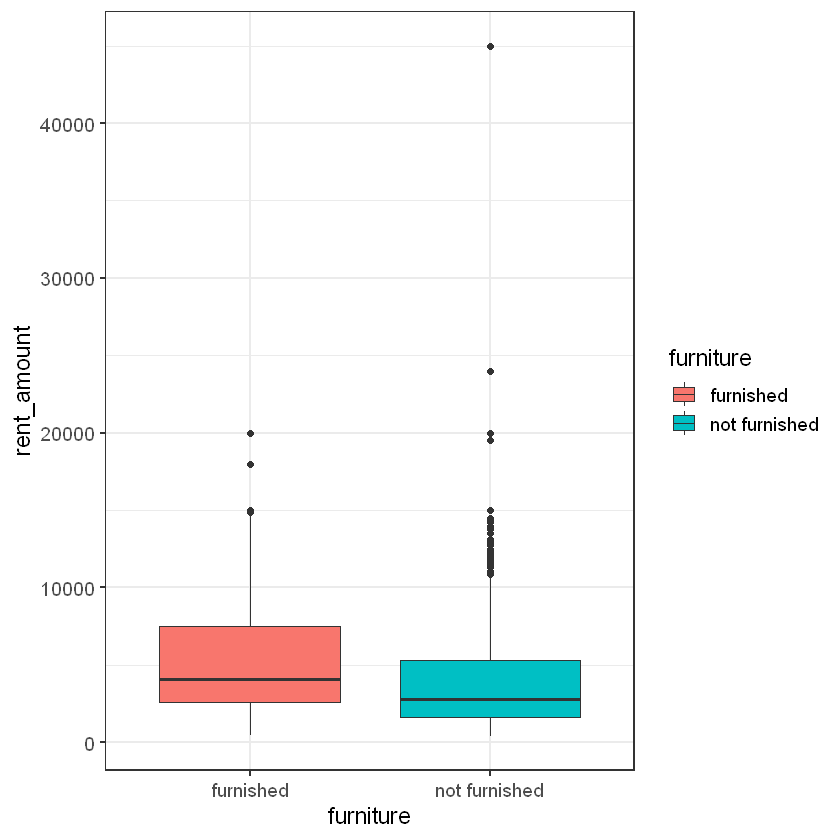

In [387]:
library(ggplot2)
ggplot(data=data, aes(x=furniture, y=rent_amount, fill=furniture)) +
geom_boxplot()  + 
theme_bw(base_size=14)

In [388]:
library(dplyr)

data %>% mutate_at(vars(area), funs(ifelse(is.na(.),median(., na.rm = TRUE),.)))

city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000",8000
0,64,2,1,1,10,acept,not furnished,R$540,R$820,820
1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000",7000
1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250",1250
1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200",1200
1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200",2200
1,55,1,NA,1,2,acept,furnished,"R$1,950","R$5,000",5000
1,55,2,NA,1,2,acept,not furnished,R$600,"R$1,300",1300
1,82,3,NA,1,3,acept,furnished,R$828,"R$2,000",2000


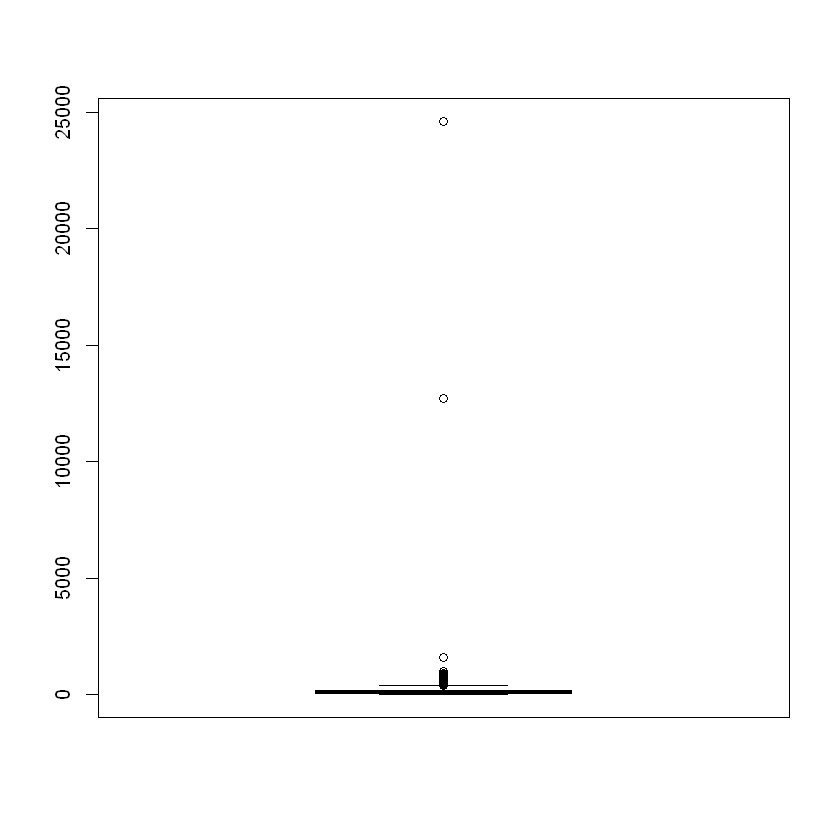

In [389]:
boxplot(data$area, data = data)

## Remarks:
- The outliers are really far away from IQR

In [390]:
area_outliers = c(boxplot.stats(data$area)$out)
area_outliers = sum(sapply(area_outliers, function(x) length(unique(x))))

In [395]:
print(paste('Data with area outliers: ', length(data$area)))
print(paste('Data without area outliers: ', length(data$area) - area_outliers))
print(paste('Number of area outliers: ', area_outliers))

[1] "Data with area outliers:  6080"
[1] "Data without area outliers:  5835"
[1] "Number of area outliers:  245"


In [399]:
library(ggExtra)
library(ggplot2)

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 17 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 17 rows containing missing values (geom_point)."


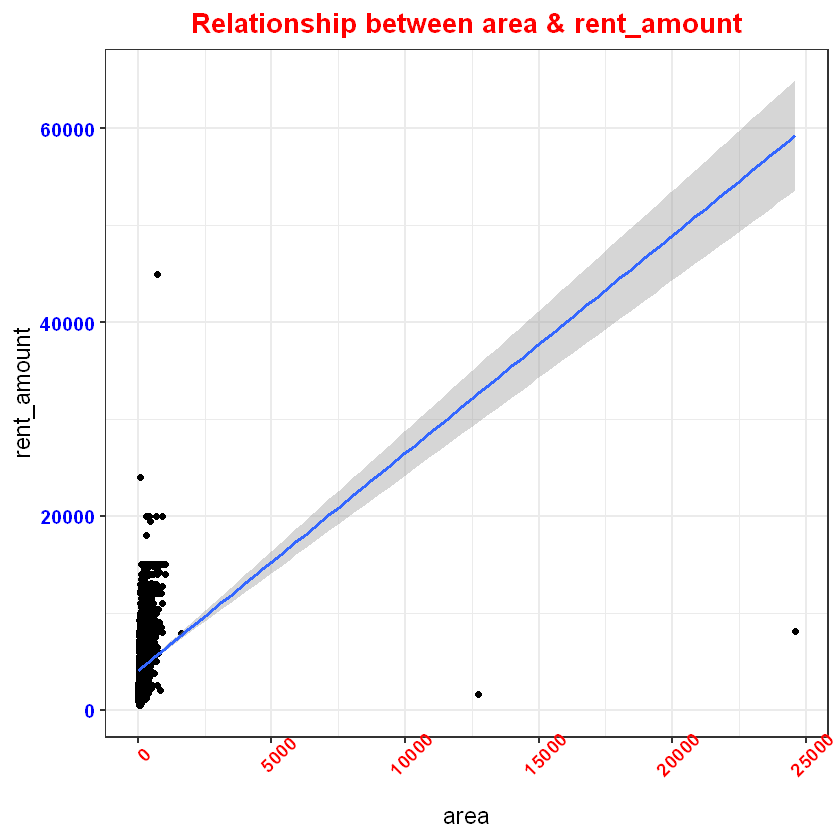

In [407]:
plot = ggplot(data=data, aes(x = area, y = rent_amount)) + 
    geom_point() + 
    ylab('rent_amount') +
    xlab('area') +
    ggtitle('Relationship between area & rent_amount') +
    theme_bw(base_size = 14) +
    geom_smooth(method='lm') +
    theme(legend.position='bottom',
         plot.title = element_text(color='red',size=16,face='bold',hjust=0.5),
         axis.text.x = element_text(face='bold', color='red',angle=45),
         axis.text.y = element_text(face='bold',color='blue'))
plot

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 17 rows containing non-finite values (stat_smooth)."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 17 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 17 rows containing missing values (geom_point)."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 17 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 17 rows containing missing values (geom_point)."


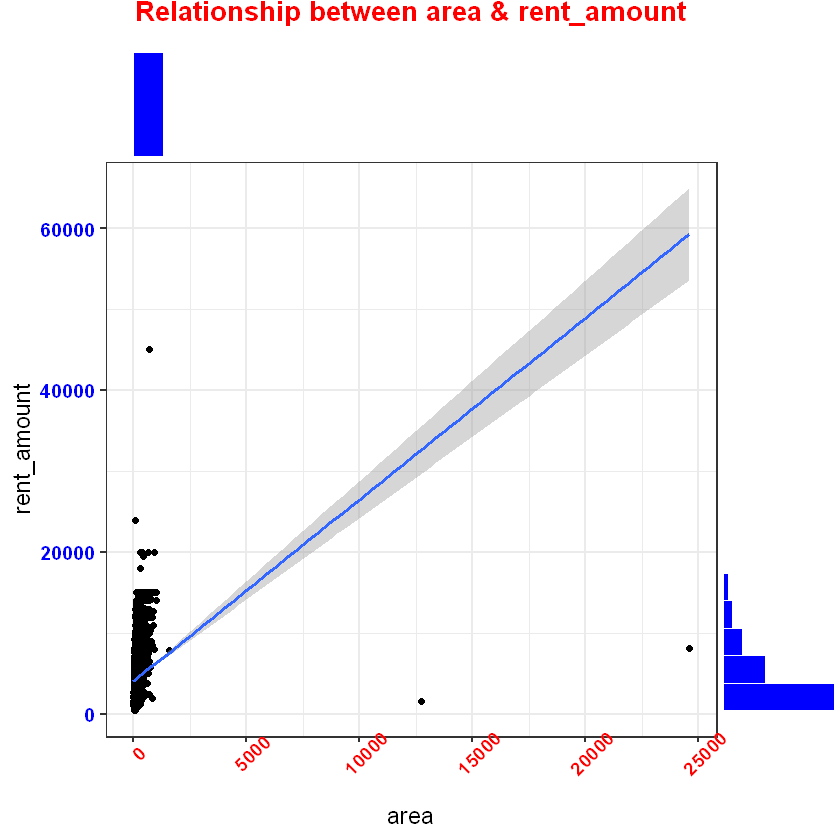

In [408]:
ggMarginal(plot, type='histogram', col='white',
          fill = 'blue',bins=20)

In [431]:
city_1 = length(which(data$city==1))
city_0 = length(which(data$city==0))
city = c(city_1, city_0)
city

[1] 5249  831

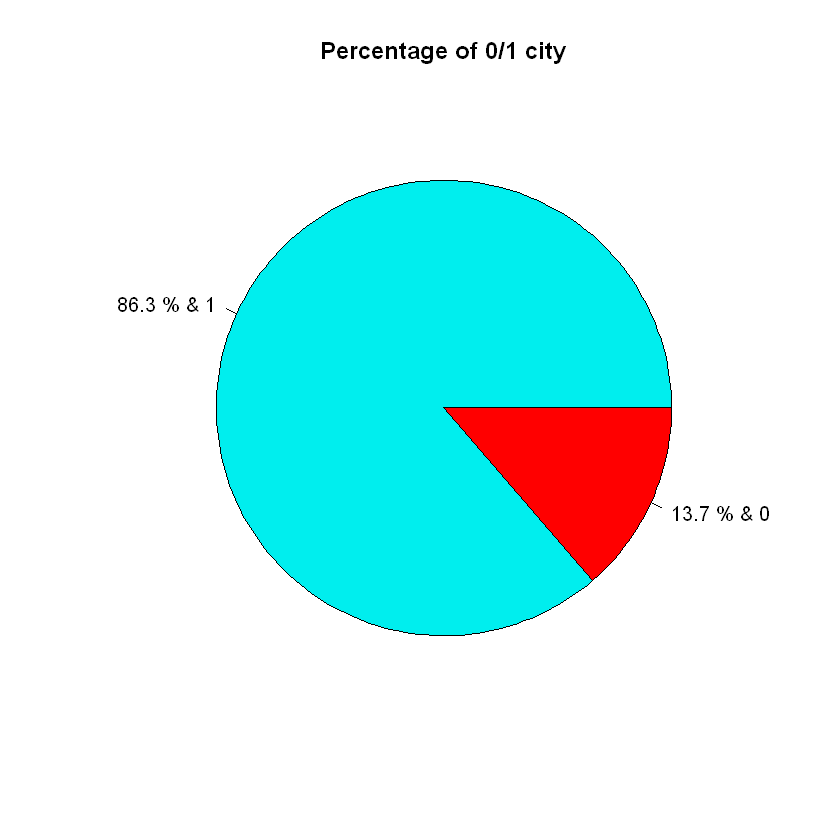

In [440]:
piepercent = round(100*city/sum(city), 1)
pie(city, main='Percentage of 0/1 city', col =c('cyan2','red'), labels  = paste(piepercent,'%','&',c('1','0')))

In [444]:
print(paste('Max rent amount:',max(data$rent_amount)))
print(paste('Min rent amount:',min(data$rent_amount)))

[1] "Max rent amount: 45000"
[1] "Min rent amount: 420"


In [445]:
data[which.max(data$rent_amount),]

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
3381,1,700,4,7,8,NA,acept,not furnished,R$0,"R$45,000",45000


In [446]:
data[which.min(data$rent_amount),]

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
2662,0,47,1,1,0,2,acept,not furnished,R$426,R$420,420


`summarise()` ungrouping output (override with `.groups` argument)



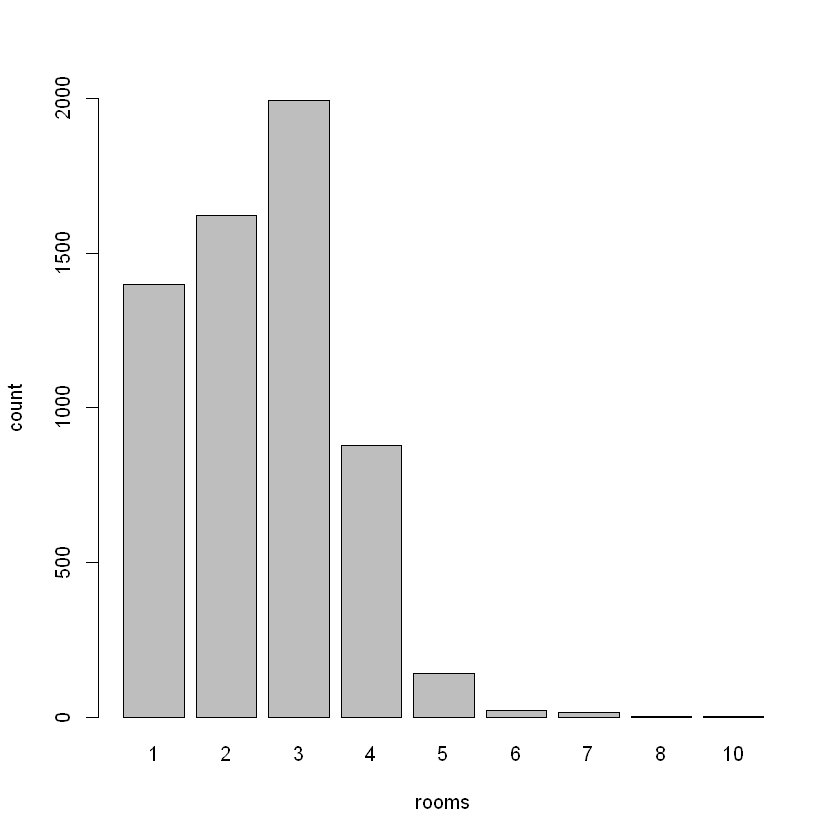

In [468]:
group_rooms = group_by(data, rooms)
summary = summarize(group_rooms,
                    room_counts = n())
barplot(summary$room_counts, names.arg=summary$rooms, xlab='rooms', ylab='count',ylim=c(0,2000))

## Remarks:
- The distribution is right skewness
- The data rooms almost center around rooms 1 to 4
- The highest frequency is room 3

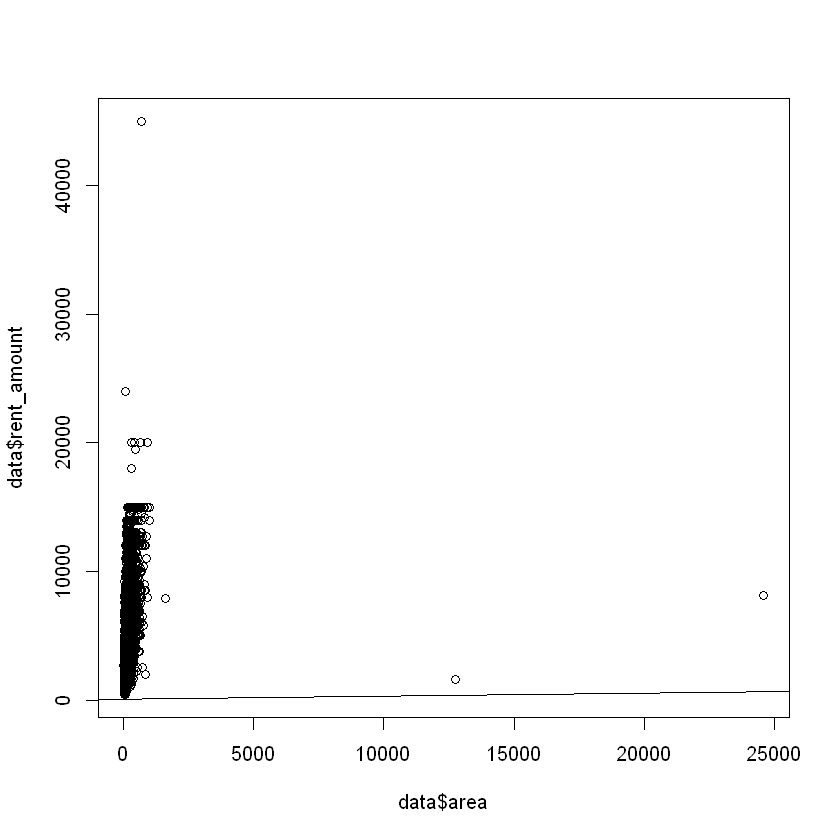

In [478]:
# Create the scatter plot with `area` on the x-axis and `rent_amount` on the y-axis
plot(data$area, data$rent_amount)

# Add a regression linewith the form `abline(lm(y ~ x))`

abline(lm(data$area ~ data$rent_amount))

In [485]:
correlations = cor(data['area'], data['rent_amount'])
print(correlations)

     rent_amount
area          NA


## Conclusion: There is no correlation between area and rent_amount variables